# Best Location for Food Truck in Toronto

### Import Libraries

In [2]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!pip install beautifulsoup4
!pip install lxml
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json

from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from bs4 import BeautifulSoup
from IPython.display import display_html
print('Libraries imported.')
%matplotlib inline

done
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py38h50d1736_0        1012 KB  conda-forge
    geopy-2.4.1                |     pyhd8ed1ab_0          71 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda                   main::conda-4.10.1-py38hecd8cb5_1 --> conda-forge::conda-4.14.0-py38h50d1736_0
  geopy                                  2.1.0-pyhd3deb0d_0 --> 2.4.1-pyhd8ed1ab_0



conda-4.14.0     

## Data Collection

### Scrape Wikipidea to get table about Toronto Neighborhoods

In [5]:
link = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(link).text
soup = BeautifulSoup(source,'lxml')
table = str(soup.table)
#type(table)
df = pd.read_html(table)
df=df[0]
df.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


## Data Cleansing

### Skip "Not Assigned" Boroughs

In [6]:
df['Borough'].value_counts()

KeyError: 'Borough'

In [6]:
df[df.Borough == "Not assigned"]

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
7,M8A,Not assigned,Not assigned
10,M2B,Not assigned,Not assigned
15,M7B,Not assigned,Not assigned
16,M8B,Not assigned,Not assigned
19,M2C,Not assigned,Not assigned
24,M7C,Not assigned,Not assigned
25,M8C,Not assigned,Not assigned
28,M2E,Not assigned,Not assigned


In [7]:
df.shape

(180, 3)

In [8]:
df = df.drop(df[(df.Borough == "Not assigned")].index)
df.shape

(103, 3)

In [9]:
df['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
East Toronto         5
York                 5
Mississauga          1
Name: Borough, dtype: int64

In [10]:
df[df.Neighbourhood == "Not assigned"].shape

(0, 3)

### Replace "Not Assigned" Neighborhoods with Borough name

In [18]:
df.Neighbourhood.replace("Not assigned", df.Borough, inplace=True)

ValueError: Series.replace cannot use dict-value and non-None to_replace

In [11]:
df.shape

(103, 3)

# Import Location Data

In [12]:
loc_df = pd.read_csv('https://cocl.us/Geospatial_data')
loc_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
loc_df.shape

(103, 3)

In [14]:
df1 = pd.merge(df,loc_df, on='Postal Code')
df1.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## Import Population Dataset

In [15]:
pop_df = pd.read_csv('popdata.csv')
pop_df.head()

,Postal Code,Population,homes
0,A0A,46587,26155
1,A0B,19792,13658
2,A0C,12587,8010
3,A0E,22294,12293
4,A0G,35266,21750


In [16]:
df2 = pd.merge(df1,pop_df, on='Postal Code')
df2.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Population,homes
0,M3A,North York,Parkwoods,43.753259,-79.329656,34615,13847
1,M4A,North York,Victoria Village,43.725882,-79.315572,14443,6299
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,41078,24186
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,21048,8751
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,10,6


Text(0.5, 1.0, 'Neighbourhood Populations')

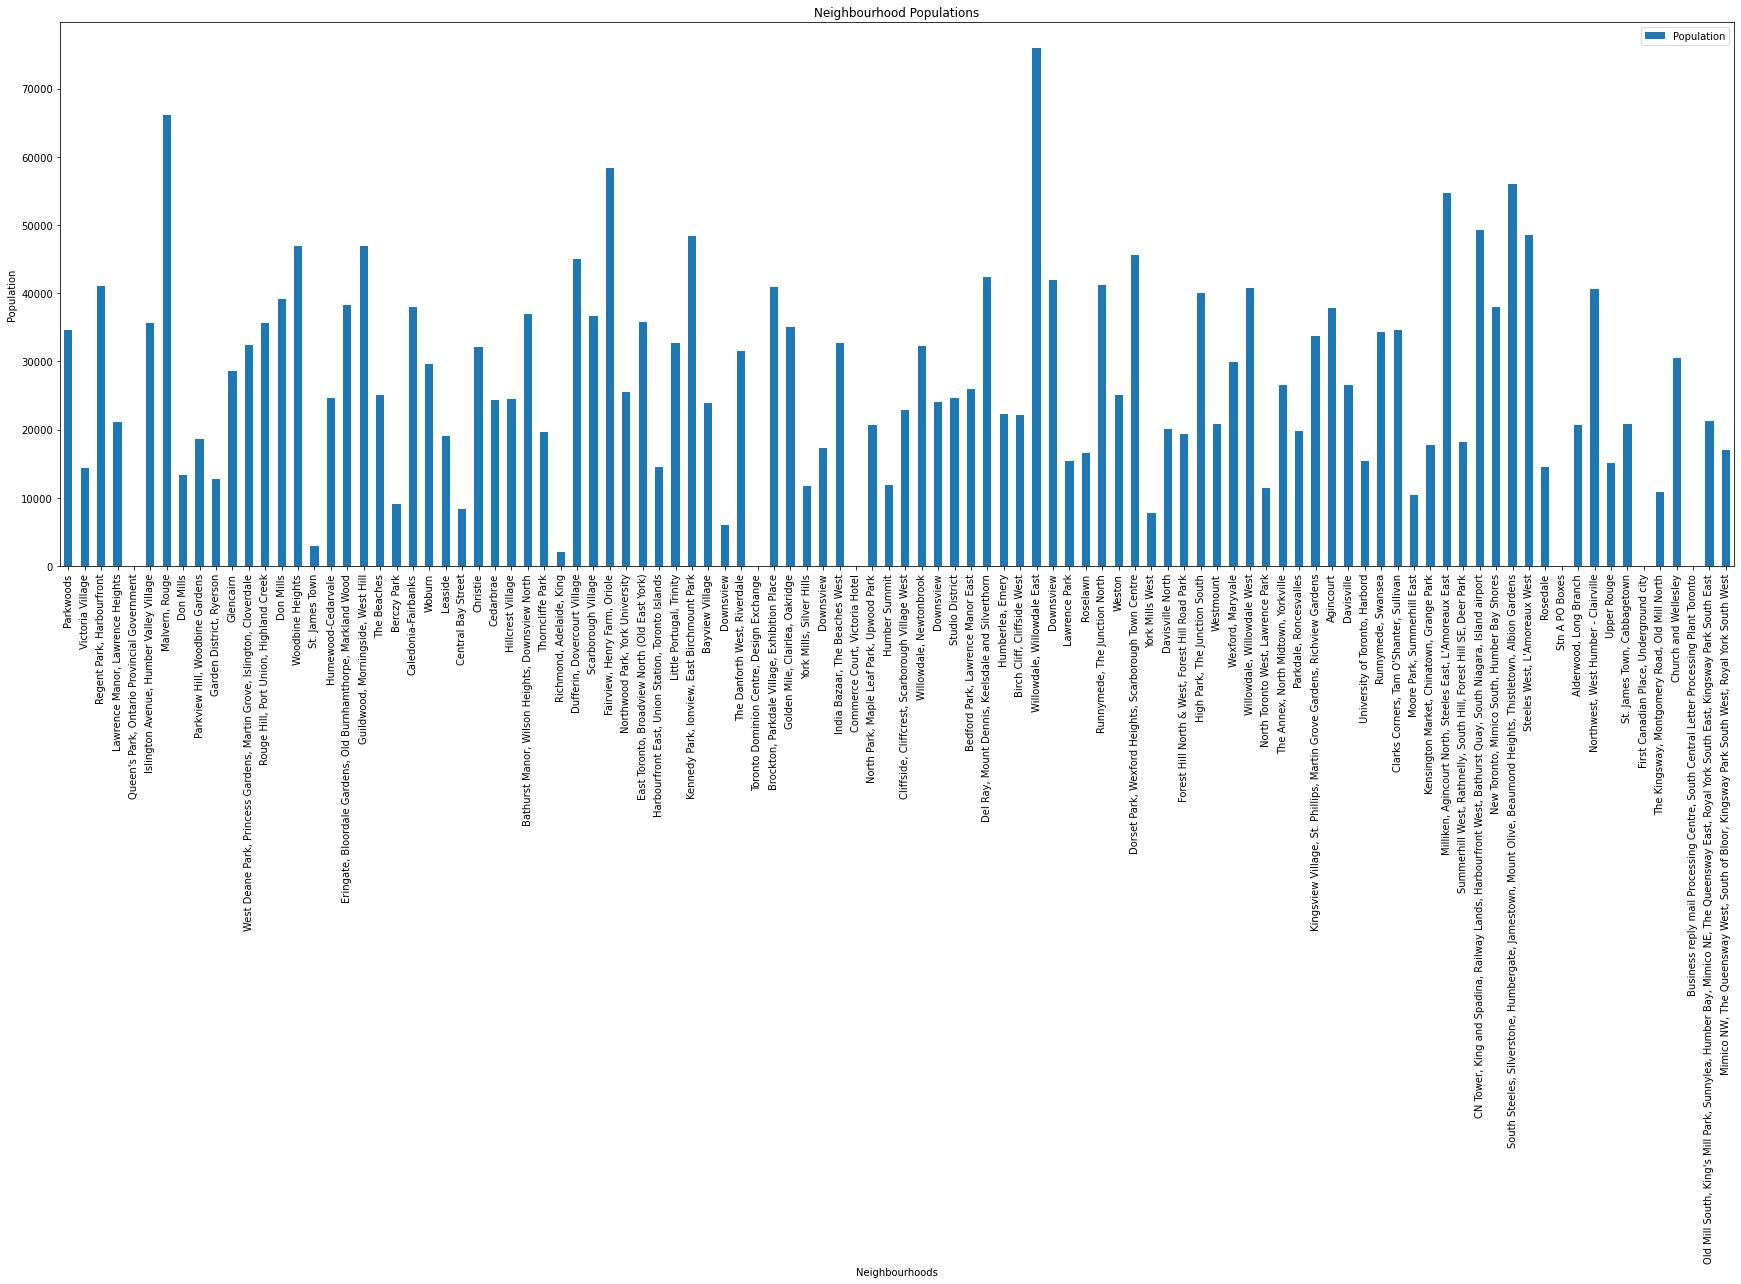

In [18]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

df4 = df2[["Neighbourhood", "Population"]]
df4.set_index('Neighbourhood', inplace = True)
df4.plot(kind='bar', figsize=(30, 10), rot=90) 

plt.xlabel('Neighbourhoods')
plt.ylabel('Population')
plt.title('Neighbourhood Populations')

## Explore Toronto

In [19]:
neighborhoods = df2
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toront are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toront are 43.6534817, -79.3839347.


### Create a map of Toronto with neighborhoods superimposed on top

In [20]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Work with only Downtown Toronto Postal Codes

In [21]:
#dtor_data = neighborhoods[neighborhoods['Borough'].str.contains('Downtown Toronto',regex=False)].reset_index(drop=True)
#dtor_data.head()
dtor_data = df2
dtor_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Population,homes
0,M3A,North York,Parkwoods,43.753259,-79.329656,34615,13847
1,M4A,North York,Victoria Village,43.725882,-79.315572,14443,6299
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,41078,24186
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,21048,8751
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,10,6


### Geograpical coordinate of Downtown Toronto

In [22]:
address = 'Downtown Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [23]:
# create map of Manhattan using latitude and longitude values
map_dtor = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dtor_data['Latitude'], dtor_data['Longitude'], dtor_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dtor)  
    
map_dtor

## Fetch Geodata from Foursquare using REST API

In [24]:
CLIENT_ID = 'K3L1KVELZTGM3EE5PBEVNDDZYG1FI5ARED3VSA55JUCLYU0E' # your Foursquare ID
CLIENT_SECRET = 'UV5FBHC01KYH5QSBE2T0LD3JHG5OB3DSUH2G50ELQC4G4F1P' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# function that extracts the category of the venues around each neighborhood
def getNearbyVenues(post, names, latitudes, longitudes, popul, house, radius=500):
    
    venues_list=[]
    for pst, name, lat, lng, pop, hou in zip(post, names, latitudes, longitudes, popul, house):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            pst,
            name, 
            lat, 
            lng,
            pop,
            hou,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code','Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Neighborhood Population',
                  'Neighborhood Homes',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#Call the above function
dtor_venues = getNearbyVenues(post=dtor_data['Postal Code'],
                              names=dtor_data['Neighbourhood'],
                                   latitudes=dtor_data['Latitude'],
                                   longitudes=dtor_data['Longitude'],
                                   popul=dtor_data['Population'],
                                   house=dtor_data['homes']
                                  )

Your credentails:
CLIENT_ID: K3L1KVELZTGM3EE5PBEVNDDZYG1FI5ARED3VSA55JUCLYU0E
CLIENT_SECRET:UV5FBHC01KYH5QSBE2T0LD3JHG5OB3DSUH2G50ELQC4G4F1P
Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, B

In [25]:
print(dtor_venues.shape)
dtor_venues.head()

(2088, 10)


,Postal Code,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Neighborhood Population,Neighborhood Homes,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,Parkwoods,43.753259,-79.329656,34615,13847,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,Parkwoods,43.753259,-79.329656,34615,13847,Brookbanks Pool,43.751389,-79.332184,Pool
2,M3A,Parkwoods,43.753259,-79.329656,34615,13847,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,M4A,Victoria Village,43.725882,-79.315572,14443,6299,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,M4A,Victoria Village,43.725882,-79.315572,14443,6299,Portugril,43.725819,-79.312785,Portuguese Restaurant


### Number of popular venues per Neighborhood

In [26]:
dtor_venues.groupby('Neighbourhood').count()

,Postal Code,Neighborhood Latitude,Neighborhood Longitude,Neighborhood Population,Neighborhood Homes,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,,,
Agincourt,4,4,4,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24,24,24,24
Berczy Park,56,56,56,56,56,56,56,56,56
"Birch Cliff, Cliffside West",4,4,4,4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",14,14,14,14,14,14,14,14,14


### Unique Venue Categories

In [27]:
print('There are {} uniques categories.'.format(len(dtor_venues['Venue Category'].unique())))

There are 270 uniques categories.


## Analyze each neighborhood

In [28]:
# one hot encoding
dtor_onehot = pd.get_dummies(dtor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dtor_onehot['Neighbourhood'] = dtor_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [dtor_onehot.columns[-1]] + list(dtor_onehot.columns[:-1])
dtor_onehot = dtor_onehot[fixed_columns]

dtor_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
dtor_onehot.shape

(2088, 271)

#### Let's group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [30]:
dtor_grouped = dtor_onehot.groupby('Neighbourhood').mean().reset_index()
dtor_grouped

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.000000,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000

In [31]:
dtor_grouped.shape

(95, 271)

#### Let's print each neighborhood along with the top 5 most common venues

In [32]:
num_top_venues = 5

for hood in dtor_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = dtor_grouped[dtor_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Clothing Store  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3  Latin American Restaurant  0.25
4         Miscellaneous Shop  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.29
1  Skating Rink  0.14
2   Coffee Shop  0.14
3           Pub  0.14
4      Pharmacy  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0                 Bank  0.09
1          Coffee Shop  0.09
2    Mobile Phone Shop  0.05
3     Sushi Restaurant  0.05
4  Fried Chicken Joint  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.08
1           Juice Bar  0.08
2  Italian Restaurant  0.08
3         Coffee Sh

                  venue  freq
0  Fast Food Restaurant  0.11
1           Pizza Place  0.06
2        Ice Cream Shop  0.06
3                  Park  0.06
4     Fish & Chips Shop  0.06


----Kennedy Park, Ionview, East Birchmount Park----
                venue  freq
0   Convenience Store   0.2
1    Department Store   0.2
2          Hobby Shop   0.2
3         Coffee Shop   0.2
4  Chinese Restaurant   0.2


----Kensington Market, Chinatown, Grange Park----
                           venue  freq
0                           Café  0.08
1                    Coffee Shop  0.07
2  Vegetarian / Vegan Restaurant  0.07
3             Mexican Restaurant  0.05
4          Vietnamese Restaurant  0.05


----Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens----
                       venue  freq
0             Sandwich Place  0.25
1                       Park  0.25
2                   Bus Line  0.25
3          Mobile Phone Shop  0.25
4  Middle Eastern Restaurant  0.00


----Lawrence Manor

               venue  freq
0     Sandwich Place  0.10
1  Indian Restaurant  0.10
2        Yoga Studio  0.05
3               Park  0.05
4         Restaurant  0.05


----Toronto Dominion Centre, Design Exchange----
                 venue  freq
0          Coffee Shop  0.11
1                Hotel  0.09
2                 Café  0.06
3           Restaurant  0.03
4  American Restaurant  0.03


----University of Toronto, Harbord----
                 venue  freq
0                 Café  0.17
1                  Bar  0.07
2  Japanese Restaurant  0.07
3            Bookstore  0.07
4               Bakery  0.07


----Victoria Village----
                   venue  freq
0            Pizza Place   0.2
1            Coffee Shop   0.2
2           Hockey Arena   0.2
3  Portuguese Restaurant   0.2
4           Intersection   0.2


----West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale----
                 venue  freq
0               Bakery   1.0
1    Accessories Store   0.0
2   Miscellaneous

### Top 10 most common venues per neighborhood

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = dtor_grouped['Neighbourhood']

for ind in np.arange(dtor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dtor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Breakfast Spot,Clothing Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Gym,Pharmacy,Coffee Shop,Skating Rink,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Supermarket,Shopping Mall,Bridal Shop,Sandwich Place,Restaurant,Pizza Place,Pharmacy
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Juice Bar,Toy / Game Store,Pub,Café,Sushi Restaurant,Indian Restaurant,Restaurant


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [35]:
# set number of clusters
kclusters = 5

dtor_grouped_clustering = dtor_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dtor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dtor_merged = dtor_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dtor_merged = dtor_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
dtor_merged.sort_values(by='Population', ascending=False, axis=0, inplace=True)
dtor_merged# check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Population,homes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,75897,36123,1.0,Ramen Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Restaurant,Shopping Mall,Café,Discount Store,Japanese Restaurant,Juice Bar
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,66108,20957,0.0,Fast Food Restaurant,Print Shop,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
33,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,58293,22524,1.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Mobile Phone Shop,Juice Bar,Bank,Bakery,Food Court,Japanese Restaurant
88,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,55959,17590,1.0,Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Beer Store,Fast Food Restaurant,Sandwich Place,Discount Store,Dog Run,Dim Sum Restaurant
84,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,54680,16449,3.0,Park,Intersection,Playground,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
86,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,49195,35058,1.0,Airport Service,Airport Terminal,Airport Lounge,Coffee Shop,Harbor / Marina,Sculpture Garden,Boat or Ferry,Airport Gate,Airport Food Court,Airport
89,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,48471,16597,1.0,Coffee Shop,Grocery Store,Pizza Place,Supermarket,Discount Store,Chinese Restaurant,Sandwich Place,Bank,Indian Restaurant,Pharmacy
38,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,48434,18620,1.0,Hobby Shop,Coffee Shop,Chinese Restaurant,Convenience Store,Department Store,Electronics Store,Eastern European Restaurant,Ethiopian Restaurant,Dumpling Restaurant,Dim Sum Restaurant
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,46943,17637,1.0,Mexican Restaurant,Electronics Store,Restaurant,Breakfast Spot,Rental Car Location,Medical Center,Intersection,Bank,Yoga Studio,Discount Store
14,M4C,East York,Woodbine Heights,43.695344,-79.318389,46866,20178,1.0,Park,Skating Rink,Spa,Beer Store,Intersection,Video Store,Curling Ice,Bus Stop,Dog Run,Diner


In [37]:
dtor_merged.dropna(inplace=True)
dtor_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Population,homes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,75897,36123,1.0,Ramen Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Restaurant,Shopping Mall,Café,Discount Store,Japanese Restaurant,Juice Bar
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,66108,20957,0.0,Fast Food Restaurant,Print Shop,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
33,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,58293,22524,1.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Mobile Phone Shop,Juice Bar,Bank,Bakery,Food Court,Japanese Restaurant
88,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,55959,17590,1.0,Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Beer Store,Fast Food Restaurant,Sandwich Place,Discount Store,Dog Run,Dim Sum Restaurant
84,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,54680,16449,3.0,Park,Intersection,Playground,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
86,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,49195,35058,1.0,Airport Service,Airport Terminal,Airport Lounge,Coffee Shop,Harbor / Marina,Sculpture Garden,Boat or Ferry,Airport Gate,Airport Food Court,Airport
89,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,48471,16597,1.0,Coffee Shop,Grocery Store,Pizza Place,Supermarket,Discount Store,Chinese Restaurant,Sandwich Place,Bank,Indian Restaurant,Pharmacy
38,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,48434,18620,1.0,Hobby Shop,Coffee Shop,Chinese Restaurant,Convenience Store,Department Store,Electronics Store,Eastern European Restaurant,Ethiopian Restaurant,Dumpling Restaurant,Dim Sum Restaurant
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,46943,17637,1.0,Mexican Restaurant,Electronics Store,Restaurant,Breakfast Spot,Rental Car Location,Medical Center,Intersection,Bank,Yoga Studio,Discount Store
14,M4C,East York,Woodbine Heights,43.695344,-79.318389,46866,20178,1.0,Park,Skating Rink,Spa,Beer Store,Intersection,Video Store,Curling Ice,Bus Stop,Dog Run,Diner


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = ['red','blue', 'green','yellow', 'purple']
rainbow = [i for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dtor_merged['Latitude'], dtor_merged['Longitude'], dtor_merged['Neighbourhood'], dtor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

## Cluster 1

In [41]:
cluster1 = dtor_merged.loc[dtor_merged['Cluster Labels'] == 0, dtor_merged.columns[[2] + list(range(5, dtor_merged.shape[1]))]]

In [42]:
cluster1

,Neighbourhood,Population,homes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Malvern, Rouge",66108,20957,0.0,Fast Food Restaurant,Print Shop,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
56,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",42434,16799,0.0,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio
64,Weston,25074,10713,0.0,Convenience Store,Jewelry Store,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
27,Hillcrest Village,24497,9093,0.0,Mediterranean Restaurant,Fast Food Restaurant,Golf Course,Dog Run,Pool,Donut Shop,Diner,Discount Store,Distribution Center,Doner Restaurant
62,Roselawn,16610,6889,0.0,Fast Food Restaurant,Garden,Home Service,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


## Cluster 2

In [43]:
dtor_merged.loc[dtor_merged['Cluster Labels'] == 1, dtor_merged.columns[[2] + list(range(5, dtor_merged.shape[1]))]]

,Neighbourhood,Population,homes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,"Willowdale, Willowdale East",75897,36123,1.0,Ramen Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Restaurant,Shopping Mall,Café,Discount Store,Japanese Restaurant,Juice Bar
33,"Fairview, Henry Farm, Oriole",58293,22524,1.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Mobile Phone Shop,Juice Bar,Bank,Bakery,Food Court,Japanese Restaurant
88,"South Steeles, Silverstone, Humbergate, Jamest...",55959,17590,1.0,Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Beer Store,Fast Food Restaurant,Sandwich Place,Discount Store,Dog Run,Dim Sum Restaurant
86,"CN Tower, King and Spadina, Railway Lands, Har...",49195,35058,1.0,Airport Service,Airport Terminal,Airport Lounge,Coffee Shop,Harbor / Marina,Sculpture Garden,Boat or Ferry,Airport Gate,Airport Food Court,Airport
89,"Steeles West, L'Amoreaux West",48471,16597,1.0,Coffee Shop,Grocery Store,Pizza Place,Supermarket,Discount Store,Chinese Restaurant,Sandwich Place,Bank,Indian Restaurant,Pharmacy
38,"Kennedy Park, Ionview, East Birchmount Park",48434,18620,1.0,Hobby Shop,Coffee Shop,Chinese Restaurant,Convenience Store,Department Store,Electronics Store,Eastern European Restaurant,Ethiopian Restaurant,Dumpling Restaurant,Dim Sum Restaurant
18,"Guildwood, Morningside, West Hill",46943,17637,1.0,Mexican Restaurant,Electronics Store,Restaurant,Breakfast Spot,Rental Car Location,Medical Center,Intersection,Bank,Yoga Studio,Discount Store
14,Woodbine Heights,46866,20178,1.0,Park,Skating Rink,Spa,Beer Store,Intersection,Video Store,Curling Ice,Bus Stop,Dog Run,Diner
65,"Dorset Park, Wexford Heights, Scarborough Town...",45571,17129,1.0,Indian Restaurant,Pet Store,Vietnamese Restaurant,Chinese Restaurant,Light Rail Station,Concert Hall,Colombian Restaurant,Fabric Shop,Event Space,Ethiopian Restaurant
31,"Dufferin, Dovercourt Village",44950,20573,1.0,Bakery,Pharmacy,Bank,Middle Eastern Restaurant,Café,Supermarket,Bar,Coffee Shop,Music Venue,Park


## Cluster 3

In [44]:
dtor_merged.loc[dtor_merged['Cluster Labels'] == 2, dtor_merged.columns[[2] + list(range(5, dtor_merged.shape[1]))]]

,Neighbourhood,Population,homes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Scarborough Village,36699,12797,2.0,Playground,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
82,"Moore Park, Summerhill East",10463,5499,2.0,Restaurant,Playground,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant


## Cluster 4

In [45]:
dtor_merged.loc[dtor_merged['Cluster Labels'] == 3, dtor_merged.columns[[2] + list(range(5, dtor_merged.shape[1]))]]

,Neighbourhood,Population,homes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,"Milliken, Agincourt North, Steeles East, L'Amo...",54680,16449,3.0,Park,Intersection,Playground,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
21,Caledonia-Fairbanks,38041,15809,3.0,Park,Bar,Women's Store,Greek Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
35,"East Toronto, Broadview North (Old East York)",35738,15312,3.0,Park,Intersection,Convenience Store,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
0,Parkwoods,34615,13847,3.0,Park,Food & Drink Shop,Pool,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
76,"Kingsview Village, St. Phillips, Martin Grove ...",33743,12755,3.0,Park,Mobile Phone Shop,Bus Line,Sandwich Place,Distribution Center,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Event Space
52,"Willowdale, Newtonbrook",32320,13086,3.0,Park,Yoga Studio,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
61,Lawrence Park,15330,6497,3.0,Park,Bus Line,Swim School,Business Service,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
90,Rosedale,14561,7918,3.0,Park,Playground,Trail,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant


## Cluster 5

In [1]:
cluster5 = dtor_merged.loc[dtor_merged['Cluster Labels'] == 4, dtor_merged.columns[[2] + list(range(5, dtor_merged.shape[1]))]]

NameError: name 'dtor_merged' is not defined